In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#My imports
import env
import acquire as a
import prepare as p

import warnings
warnings.filterwarnings('ignore')

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

### Store Item Demand
Load your store item demand data using your acquire and/or prepare functions.

Using a human-based approach, split your dataset into train and test sets.
Visualize your train-test split.

In [2]:
#Getting my data
df = a.get_store_data()

In [3]:
#Prep Store data
df = p.prepare_sales(df)

In [4]:
df.head(2)

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16


In [5]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31',
               '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31',
               '2017-12-31', '2017-12-31'],
              dtype='datetime64[ns]', name='sale_date', length=913000, freq=None)

In [6]:
#Split the data
train = df[:'2016']
test = df['2017']

In [7]:
train.head()

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


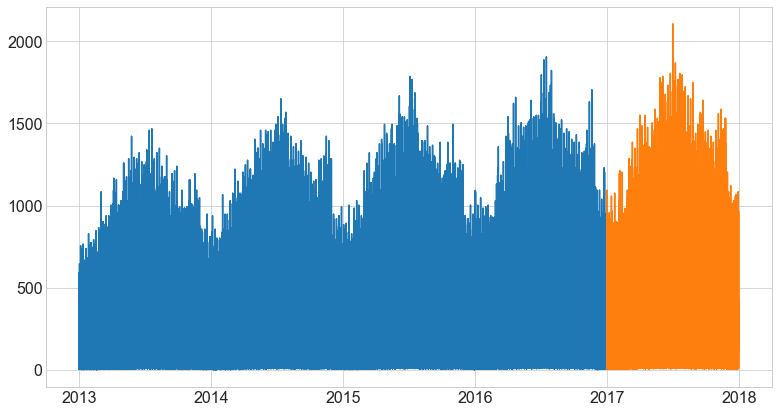

In [8]:
#Visualize Train Test Split
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

### Only use your train data set to perform the following tasks:

#### Resample your data and visualize it.

In [9]:
y = train.sales_total

<AxesSubplot:title={'center':'2 week average'}, xlabel='sale_date'>

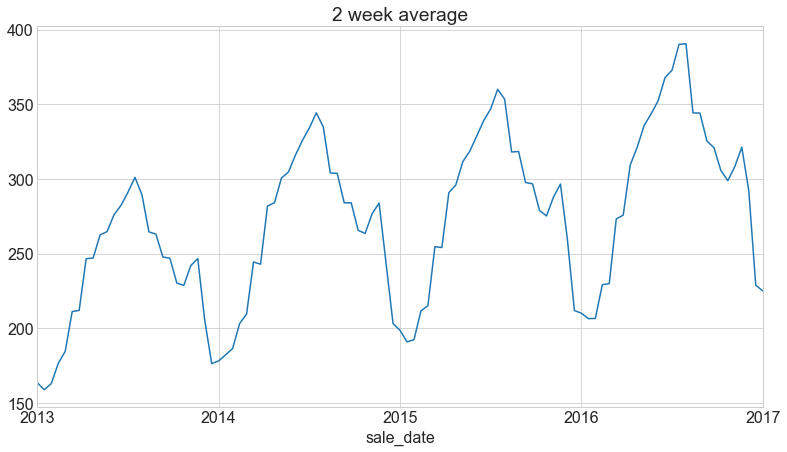

In [10]:
y.resample('2W').mean().plot(title='2 week average')

### 4. Creating a rolling (moving) average of your data and visualize it.

,item_id,item_upc14,item_upc12,item_price,sale_id,sale_amount,store_zipcode,sales_total,rolling_6,rolling_12,rolling_24
sale_date,,,,,,,,,,,
2013-01-06,25.5,2.384688e+11,2.384688e+11,5.1604,455590.5,30.355667,78224.8,163.589167,NaN,NaN,NaN
2013-01-13,25.5,2.384688e+11,2.384688e+11,5.1604,455597.0,29.686286,78224.8,159.981203,NaN,NaN,NaN
2013-01-20,25.5,2.384688e+11,2.384688e+11,5.1604,455604.0,29.414286,78224.8,157.946720,NaN,NaN,NaN
2013-01-27,25.5,2.384688e+11,2.384688e+11,5.1604,455611.0,29.513714,78224.8,158.545383,NaN,NaN,NaN
2013-02-03,25.5,2.384688e+11,2.384688e+11,5.1604,455618.0,31.150571,78224.8,167.585014,NaN,NaN,NaN
2013-02-10,25.5,2.384688e+11,2.384688e+11,5.1604,455625.0,32.733143,78224.8,176.455603,164.017182,NaN,NaN
2013-02-17,25.5,2.384688e+11,2.384688e+11,5.1604,455632.0,32.931714,78224.8,176.684657,166.199763,NaN,NaN
2013-02-24,25.5,2.384688e+11,2.384688e+11,5.1604,455639.0,32.790286,78224.8,175.990683,168.868010,NaN,NaN
2013-03-03,25.5,2.384688e+11,2.384688e+11,5.1604,455646.0,35.947429,78224.8,193.379200,174.773423,NaN,NaN


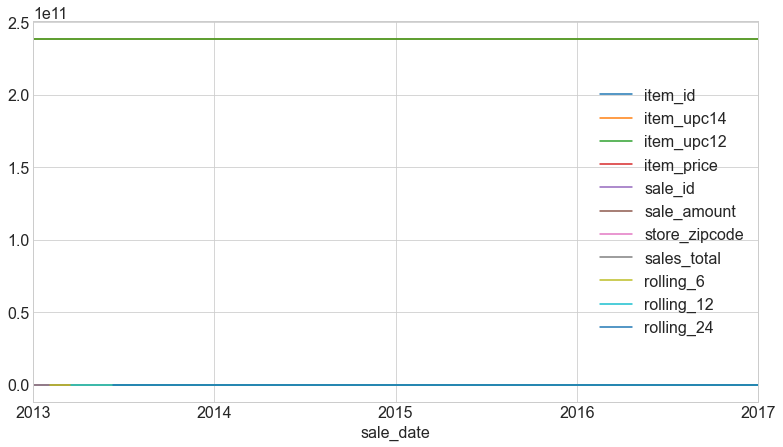

In [11]:
rolling_df = train.resample('W').mean().assign( #resampling by week, rolling 6, 12, 24 weeks out
    rolling_6=lambda train: train.sales_total.rolling(6).mean(),
    rolling_12=lambda train: train.sales_total.rolling(12).mean(),
    rolling_24=lambda train: train.sales_total.rolling(24).mean(),
)
rolling_df.plot()
rolling_df.head(20)

<AxesSubplot:xlabel='sale_date'>

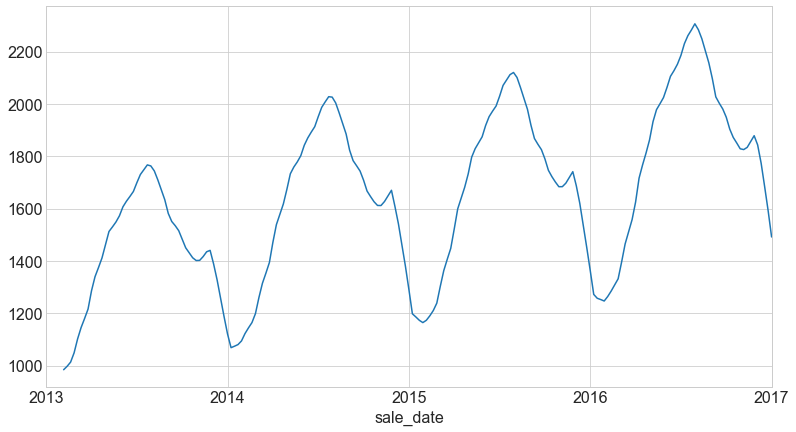

In [12]:
#Resample by week, rolling total four weeks
train.resample('W').sales_total.mean().rolling(6).sum().plot()

### 5. Plot the difference in sales from one day to the next.

<AxesSubplot:xlabel='sale_date'>

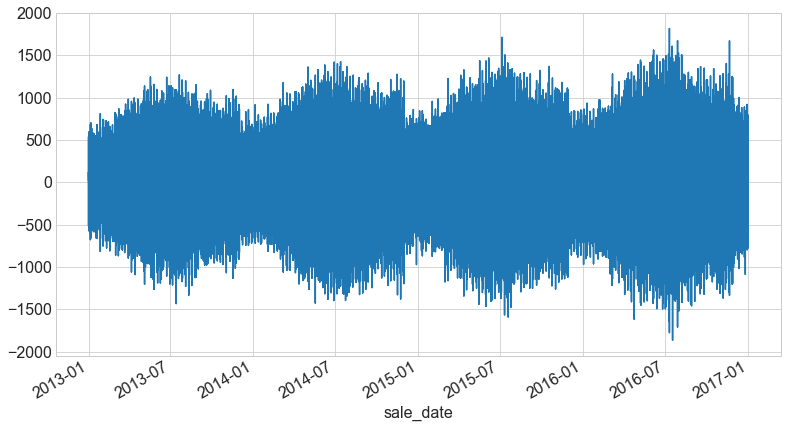

In [13]:
#.diff() to get the difference from one day to the next:
train.sales_total.diff(1).plot()

### 6. Plot the % difference in sales from one day to the next.

In [14]:
train['shift(-1)'] = train.sales_total.shift(-1)

In [15]:
train.head(2)

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total,shift(-1)
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92,30.16
2013-01-01,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16,308.48


<AxesSubplot:title={'center':'Daily % Change in Sales'}, xlabel='sale_date'>

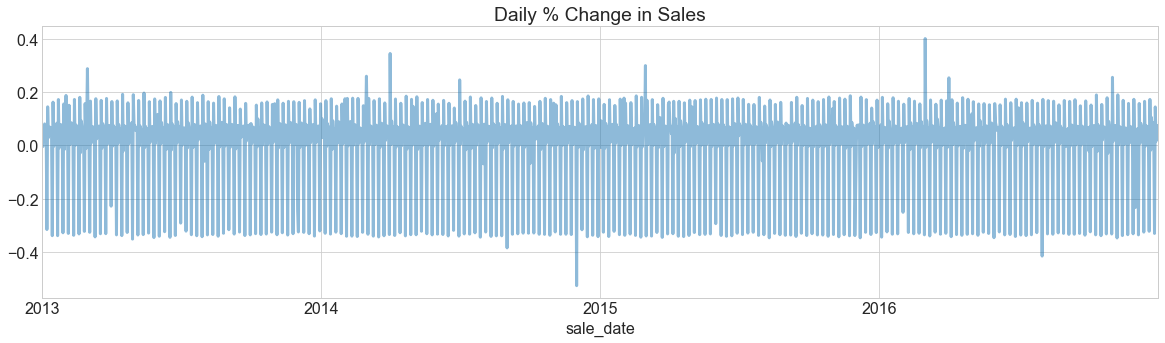

In [17]:
plt.figure(figsize=(20,5))
daily_sales = y.resample('D').mean()
(daily_sales.diff() / daily_sales.shift()).plot(alpha=.5, lw=3, title='Daily % Change in Sales')

### 7. Plot the % difference in sales from one week to the next.

<AxesSubplot:title={'center':'Weekly % Change in Sales'}, xlabel='sale_date'>

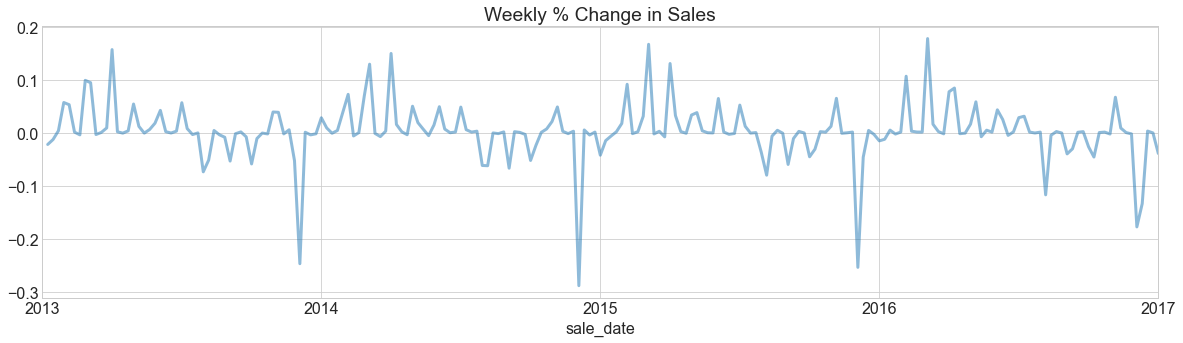

In [18]:
plt.figure(figsize=(20,5))
weekly_sales = y.resample('W').mean()
(weekly_sales.diff() / weekly_sales.shift()).plot(alpha=.5, lw=3, title='Weekly % Change in Sales')

### 8. Plot the % difference in sales from one month to the next.

<AxesSubplot:title={'center':'Monthly % Change in Sales'}, xlabel='sale_date'>

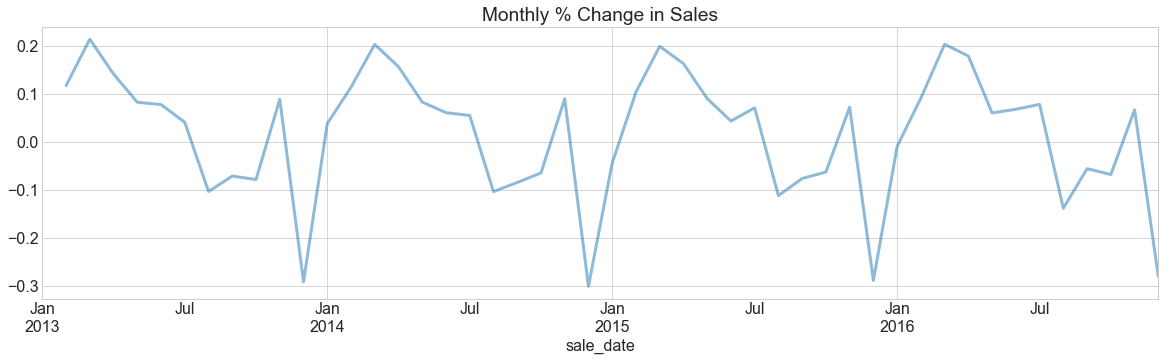

In [19]:
plt.figure(figsize=(20,5))
monthly_sales = y.resample('M').mean()
(monthly_sales.diff() / monthly_sales.shift()).plot(alpha=.5, lw=3, title='Monthly % Change in Sales')

### 9. Visualize an autocorrelation plot on a weekly resampling.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

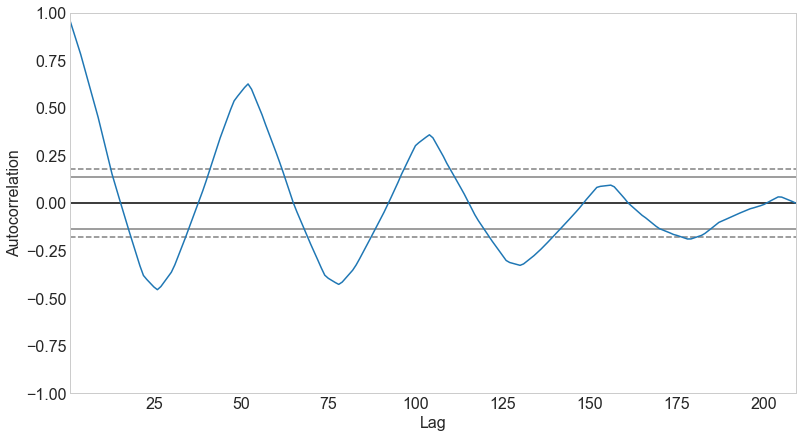

In [20]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

### 10. Visualize a seasonal decomposition plot on a weekly resampling.

In [21]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,163.589167,NaN,-77.434789,NaN
2013-01-13,159.981203,NaN,-79.225757,NaN
2013-01-20,157.946720,NaN,-79.904284,NaN
2013-01-27,158.545383,NaN,-80.259357,NaN
2013-02-03,167.585014,NaN,-77.352692,NaN


<AxesSubplot:xlabel='sale_date'>

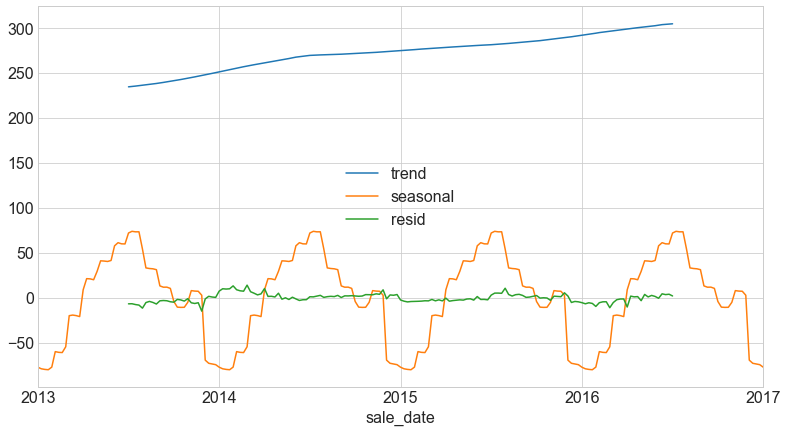

In [22]:
decomposition.iloc[:, 1:].plot() #'Level component' is mean of the entire dataset

<AxesSubplot:xlabel='sale_date'>

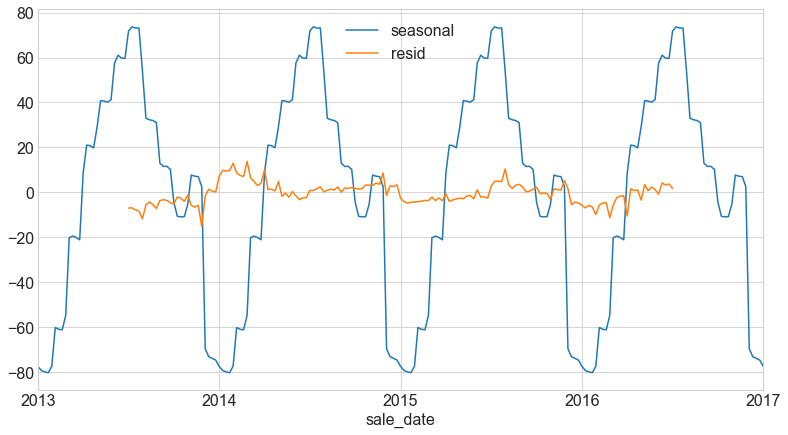

In [23]:
#Looking at slicing, the iloc function takes all, starts at second column (you lose trend)
decomposition.iloc[:,2:].plot()

## OPS Data

In [24]:
#Get OPS data
power_df = a.get_power_data()
power_df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [25]:
#Prep OPS data
power_df = p.prepare_ops(power_df)

### 1. Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test.

In [26]:
power_df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [27]:
#Split OPS data
train = power_df[:'2013']
test = power_df['2013':]

In [28]:
train.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


### 2. Visualize train-test split

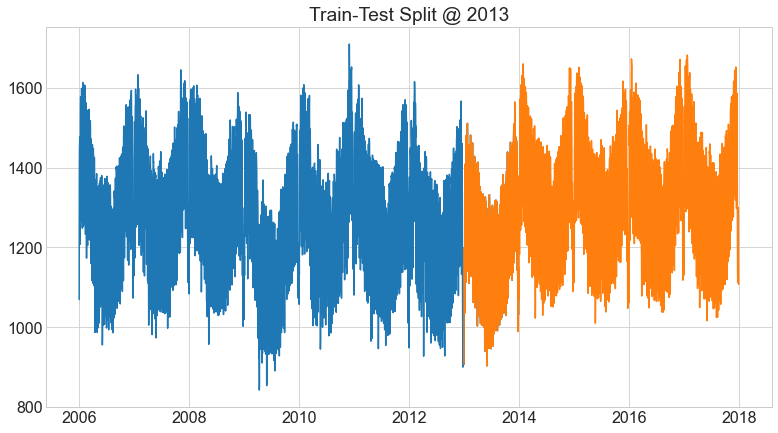

In [29]:
#Visualize Train Test Split
plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)
plt.title('Train-Test Split @ 2013')
plt.show()

### 3. Plot the consumption, wind, and solar data on the same chart.

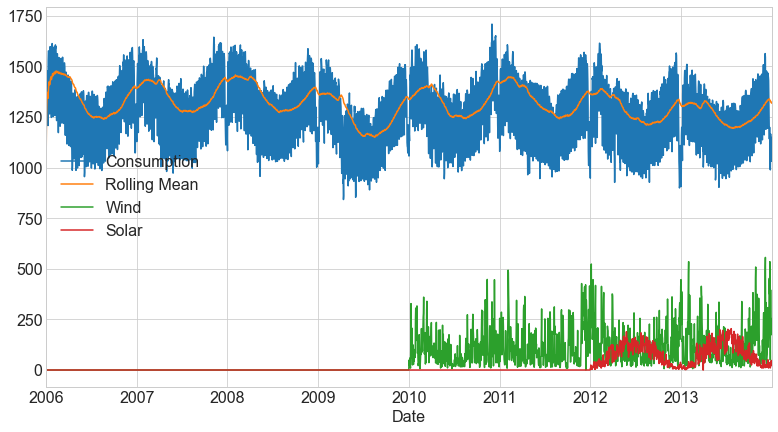

In [38]:
train.Consumption.plot(label='Consumption')
plt.plot(train['Consumption'].rolling('90D').mean(), label ="Rolling Mean")
train.Wind.plot()
train.Solar.plot()
plt.legend()
plt.show()

### 4. Plot only the consumption data from the year 2010. Are there any patterns you can identify? Note them in a markdown section.

In [31]:
consumption_2010 = train[train.year == 2010]

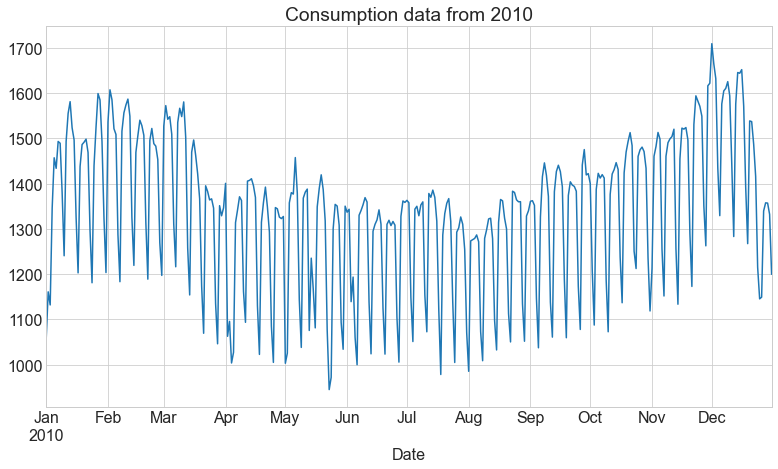

In [32]:
consumption_2010.Consumption.plot()
plt.title('Consumption data from 2010')
plt.show()

<AxesSubplot:xlabel='Date'>

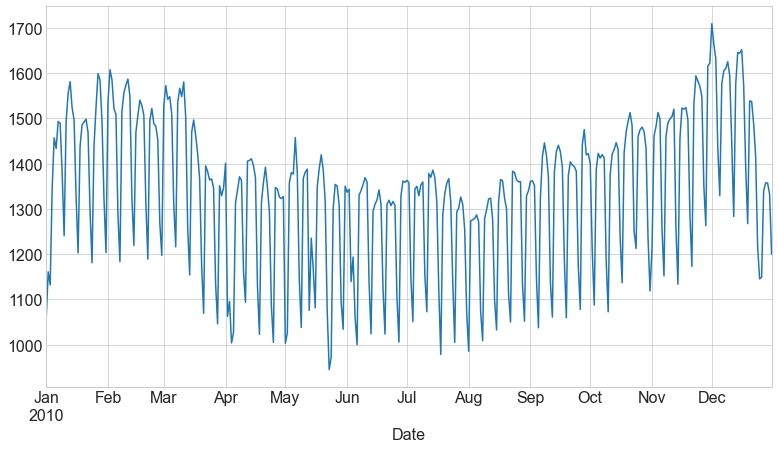

In [35]:
#Another Way
train['2010'].Consumption.plot()

### It appears that consumption is higher in the winter, peaking in December, and lowest in the summer

### 5. Resample the consumption data to monthly and plot it.

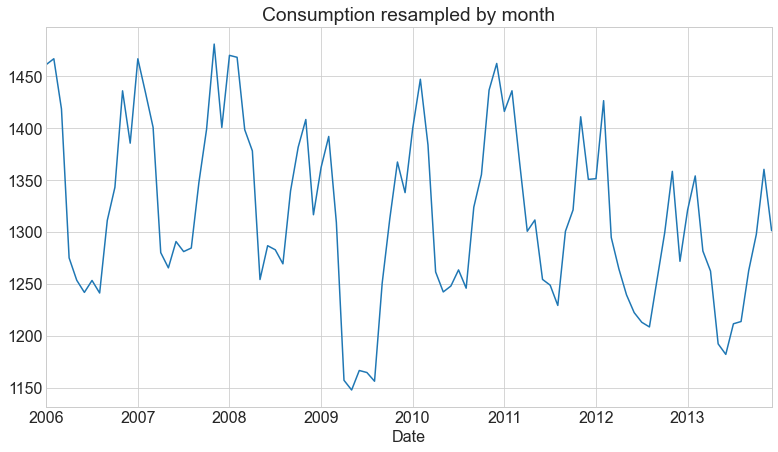

In [39]:
train.Consumption.resample('M').mean().plot()
plt.title('Consumption resampled by month')
plt.show()

In [ ]:
#As above, it appears that consumption peaks in the winter, and dips in the summer

### 6. Resample the consumption data to yearly and plot it.

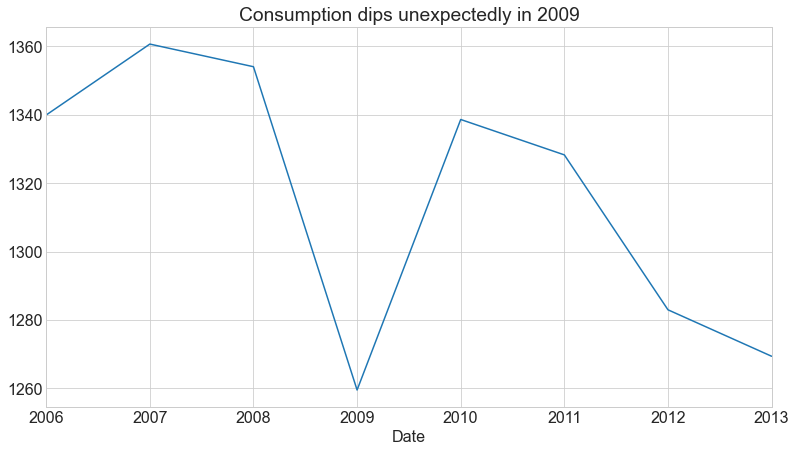

In [40]:
train.Consumption.resample('Y').mean().plot()
plt.title('Consumption dips unexpectedly in 2009')
plt.show()

## Bonus

### Group the consumption data by month and create a boxplot treating the month component as a separate categorical feature.

In [ ]:
train.Consumption.resample('M').mean()

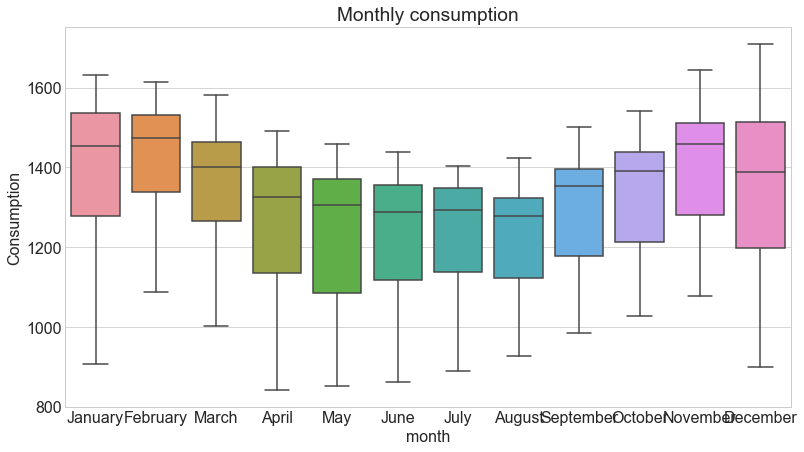

In [43]:
sns.boxplot(data=train, x = 'month', y = 'Consumption')
plt.title('Monthly consumption')
plt.show()

In [53]:
#Adding day of the week column
train['day_of_week'] = train.index.day_name()

In [54]:
train.head()

,Consumption,Wind,Solar,Wind+Solar,month,year,day_of_week
Date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006,Sunday
2006-01-02,1380.521,0.0,0.0,0.0,January,2006,Monday
2006-01-03,1442.533,0.0,0.0,0.0,January,2006,Tuesday
2006-01-04,1457.217,0.0,0.0,0.0,January,2006,Wednesday
2006-01-05,1477.131,0.0,0.0,0.0,January,2006,Thursday


<AxesSubplot:xlabel='day_of_week', ylabel='Consumption'>

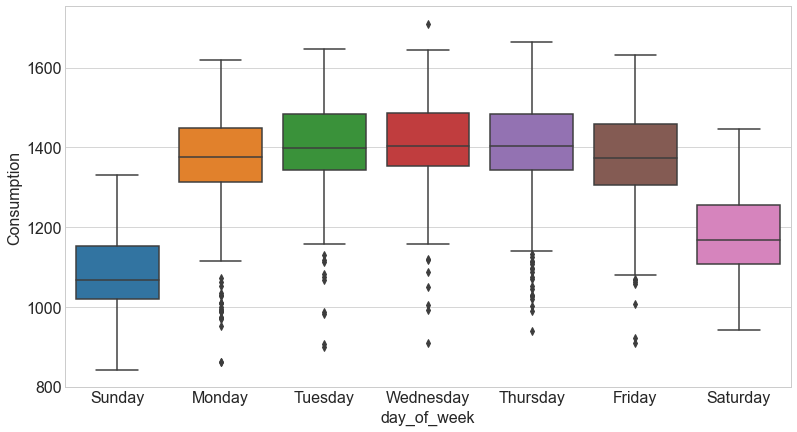

In [55]:
#Boxplot day of the week
sns.boxplot(data=train, x = 'day_of_week', y='Consumption')